# ORIE 4580/5580/5581 Assignment 3

#### Students: Katie Zelvin (klz24) and London Brown (lmb395)

### Github link:

https://github.com/katiezelvin/orie4580-hw

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output


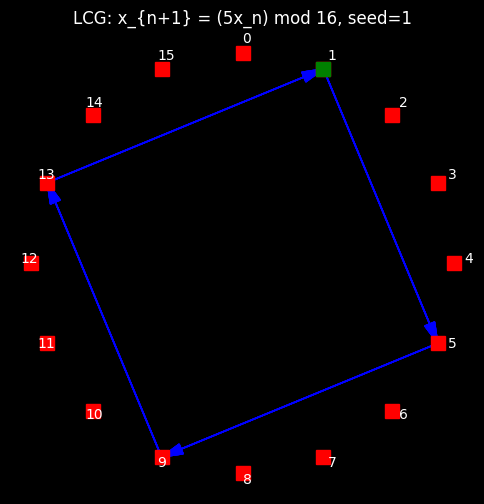

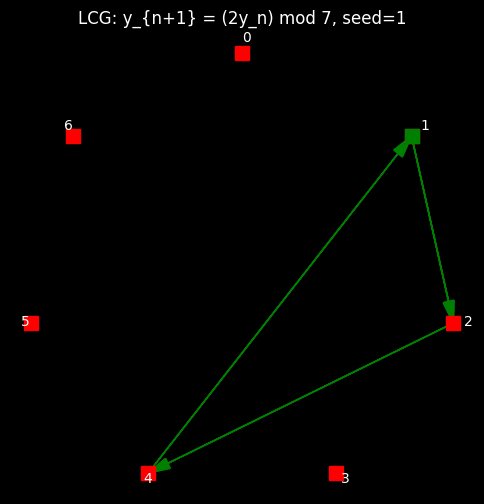

In [ ]:
# Ans

# COPIED FROM NOTEBOOK IN CLASS
# Make sure we have the packages we need
import numpy as np
from scipy import stats
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

import matplotlib.pyplot as plt

# assuming you already have LCG, plot_clock_face, and plot_clock_path defined

# LCG 1
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(6,6))
plot_clock_face(m, fig, annotate=True)

x = LCG(n=m+1, m=m, a=a, c=c, seed=seed)
plot_clock_path(m, x, fig, color='b')

plt.axis('off')
plt.title("LCG: x_{n+1} = (5x_n) mod 16, seed=1")
plt.show()


# LCG 2
m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(6,6))
plot_clock_face(m, fig, annotate=True)

y = LCG(n=m+1, m=m, a=a, c=c, seed=seed)
plot_clock_path(m, y, fig, color='g')

plt.axis('off')
plt.title("LCG: y_{n+1} = (2y_n) mod 7, seed=1")
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

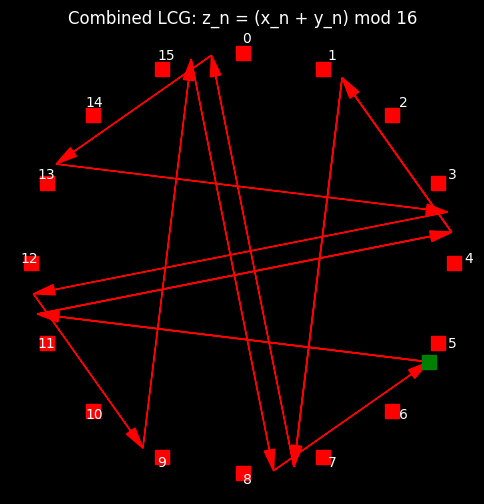

In [ ]:
m_x, a_x, c_x, seed_x = 16, 5, 0, 1
m_y, a_y, c_y, seed_y = 7, 2, 0, 1

n = 17
x = LCG(n, m_x, a_x, c_x, seed_x)
y = LCG(n, m_y, a_y, c_y, seed_y)

z = [(x[i] + y[i]) % m_x for i in range(n)]

fig = plt.figure(figsize=(6,6))
plot_clock_face(m_x, fig, annotate=True)
plot_clock_path(m_x, z, fig, color='r')

plt.axis('off')
plt.title("Combined LCG: z_n = (x_n + y_n) mod 16")
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

Period of $x_n$: 4

Period of $y_n$: 3

Period of $z_n$: 12


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

$$
F^{-1}(y) =
\begin{cases}
0, & 0 < y \le \tfrac{1}{2}, \\[6pt]
y, & \tfrac{1}{2} < y < 1, \\[6pt]
1, & y = 1.
\end{cases}
$$



___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

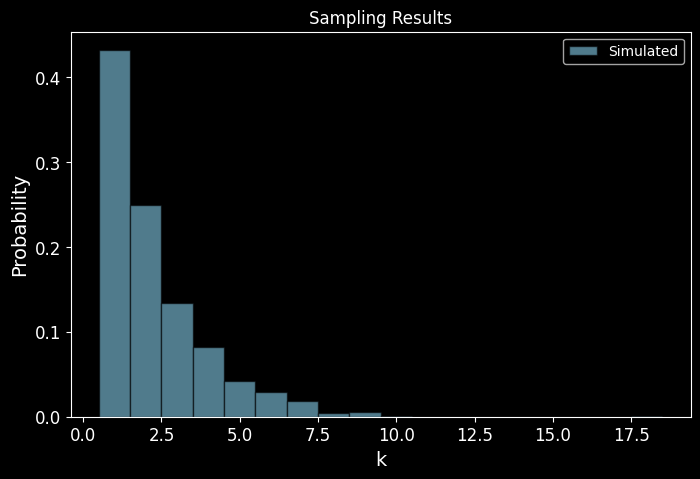

In [ ]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt

p = 0.42
n_samples = 1000

U = np.random.uniform(size=n_samples)
samples = np.ceil(np.log(1 - U) / np.log(1 - p)).astype(int)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.hist(samples, bins=np.arange(1, max(samples)+2)-0.5,
        density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated')

ax.set_xlabel("k")
ax.set_ylabel("Probability")
ax.set_title(f"Sampling Results")
ax.legend()

plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

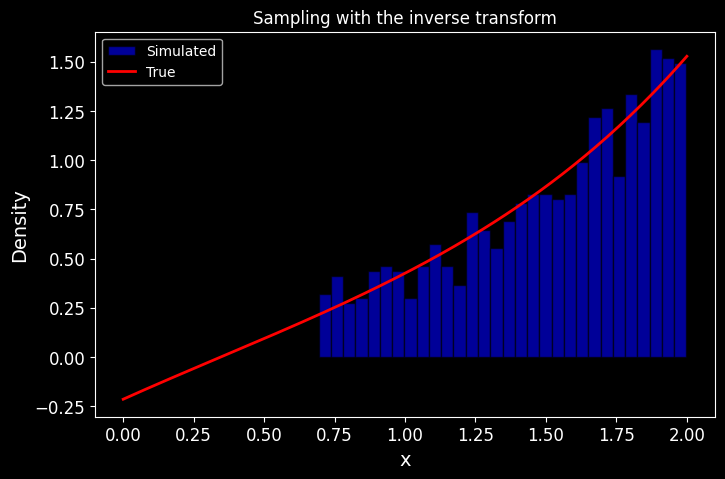

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x_min, x_max = 0, 2

F_max = np.exp(2) + 2*np.exp(-2) - 3

def inverse_cdf(u):
    inv_cdf = lambda x: (np.exp(x) + 2*np.exp(-x) - 3) / F_max - u
    x0 = 1.0
    x_sol = fsolve(inv_cdf, x0)[0]
    return x_sol

n_samples = 1000
U = np.random.uniform(size=n_samples)
samples = np.array([inverse_cdf(u) for u in U])

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.hist(samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Simulated')

x_plot = np.linspace(0, 2, 200)
pdf = np.exp(x_plot) - 2*np.exp(-x_plot)
pdf /= F_max
ax.plot(x_plot, pdf, 'r-', lw=2, label='True')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Sampling with the inverse transform')
ax.legend()
plt.show()

The histogram generally follows the trend of the pdf.



<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/4

q = lambda x: 1
c = 3.25

# Acceptance-Rejection sampling as given by Chapter 4 of simulation textbook
def sample_X(n_samples):
    samples = []
    while len(samples) < n_samples:
        Y = np.random.uniform(0,1)        # Step 1
        U = np.random.uniform(0,1)        # Step 2
        if U < f(Y)/c:                    # Step 3
            samples.append(Y)
    return np.array(samples)

n_samples = 1000
X_samples = sample_X(n_samples)


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.
We know that the acceptance probability p = 1/c, and that $\mathbb{E}[samples]=1/p = c = 3.25$


<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

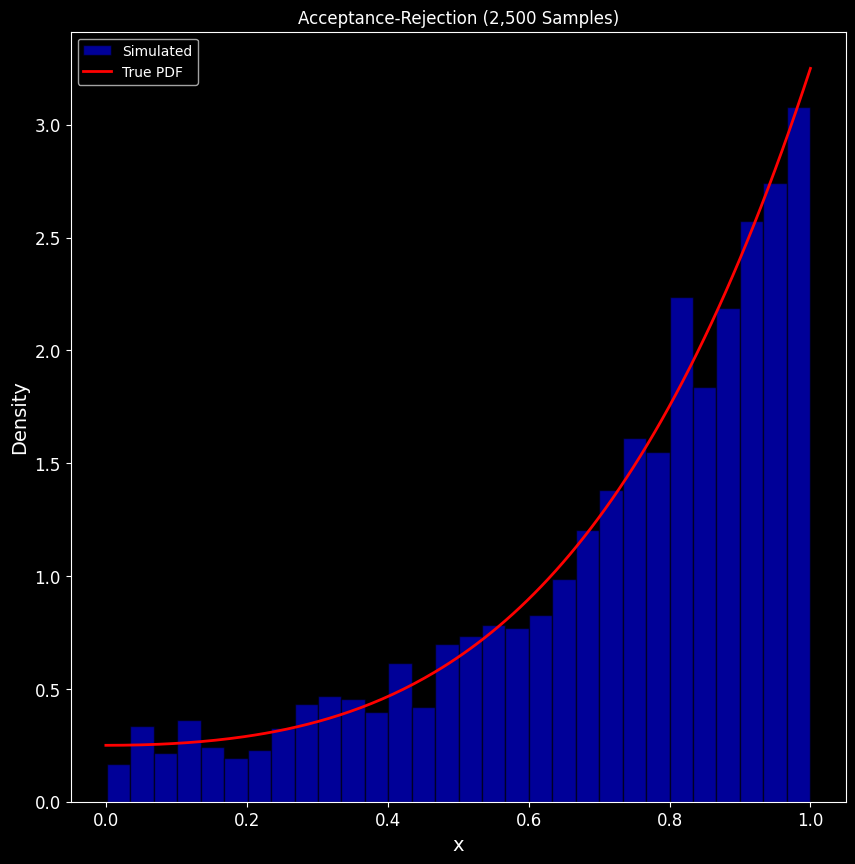

In [ ]:
def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/4

q = lambda x: 1
c = 3.25

# Acceptance-Rejection sampling as given by Chapter 4 of simulation textbook
def sample_X(n_samples):
    samples = []
    while len(samples) < n_samples:
        Y = np.random.uniform(0,1)        # Step 1
        U = np.random.uniform(0,1)        # Step 2
        if U < f(Y)/c:                    # Step 3
            samples.append(Y)
    return np.array(samples)

n_samples = 2500
X_samples = sample_X(n_samples)

x_plot = np.linspace(0,1,200)
plt.hist(X_samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Simulated')
plt.plot(x_plot, f(x_plot), 'r-', lw=2, label='True PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection (2,500 Samples)')
plt.legend()
plt.show()

Though they look similar, when we generate 2,500 samples, the histrogram is a closer fit to the true pdf than the histogram of 1,000 samples.

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

Description:From chapter 5 in the textbook, we know that the inverse transofrm algorithm involves taking a continuous distibution function G. Then the random variable X is defined by X=G^-1(U). In this case, the CDF of g(x) is $G(x) = \frac{1}{2}e^x for x < 0$ and $G(x)=1-\frac{1}{2}e^{-x} for  x \geq 0$. Then, U is Uniform(0,1), so the inversion is $X = log(2U) for U < \frac{1}{2}$ and $X = -log(2(1-U)) for U \geq \frac{1}{2}$.

In [ ]:
def laplace():
    U = np.random.uniform(0,1,n_samples)
    X = np.log(2*U) if U < 0.5 else -np.log(2*(1-U))
    return X

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

Choose the smallest k $\geq$ f(x)/g(x) for all x. $k \leq \sqrt{2/\pi}e^{|x|-x^2/2}$. Plugging in x=1, since that is where the maximum occurs, $k=\sqrt{2/\pi}e^{1/2}$. $k=1.315489247$. The acceptance probability is $p=1/k= 1/1.315489247\approx 0.760$. The expected number of samples needed for generating each sample is simply $\mathbb{E}[samples]=k=1.315489247$.

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

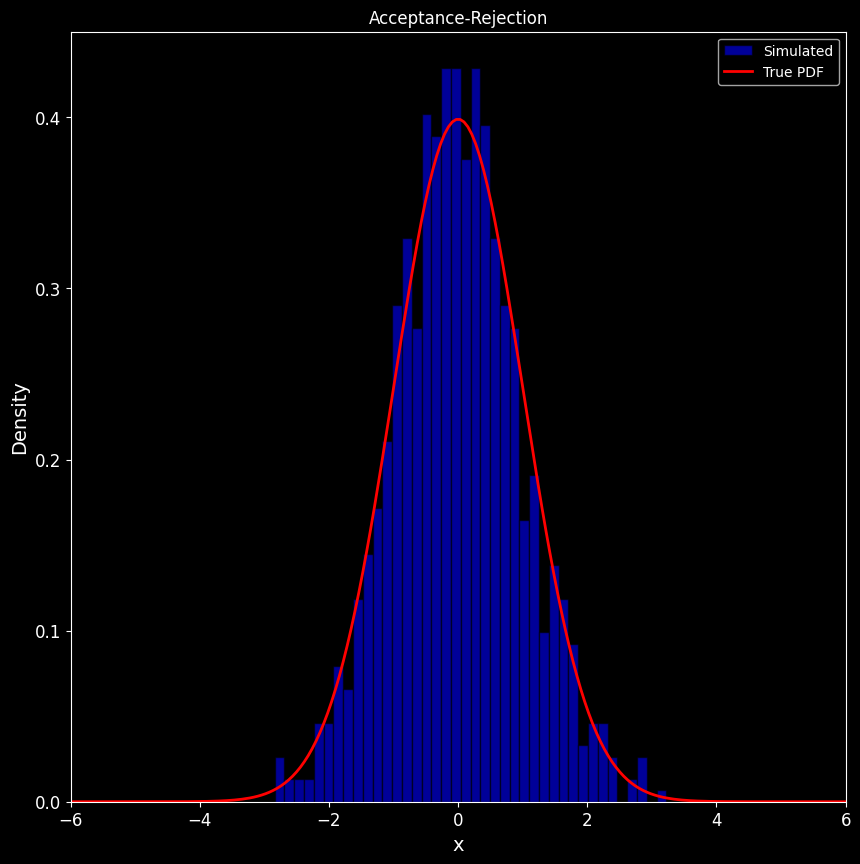

Average uniforms/sample: 2.542
95% CI: (2.468, 2.616)


In [ ]:
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def g(x):
    return np.exp(-np.abs(x))/2

def laplace():
    U = np.random.uniform()
    X = np.log(2*U) if U < 0.5 else -np.log(2*(1-U))
    return X
k = 1.315489247
def sample_X(n_samples):
    samples = []
    uniforms = []  # help from Claude for uniforms

    while len(samples) < n_samples:
        u_count = 0
        accepted = False
        while not accepted:
            Y = laplace()
            u_count += 1  # help from Claude
            U = np.random.uniform()
            u_count += 1  # help from Claude

            if U < f(Y)/(k*g(Y)):
                samples.append(Y)
                uniforms.append(u_count)
                accepted = True

    return np.array(samples), np.array(uniforms)
n_samples = 1000
X_samples, uniforms = sample_X(n_samples)
x_plot = np.linspace(-6, 6, 200)
plt.hist(X_samples, bins=40, density=True, alpha=0.6, color='blue', edgecolor='black', label='Simulated')
plt.plot(x_plot, f(x_plot), 'r-', lw=2, label='True PDF')
plt.xlim(-6,6)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection')
plt.legend()
plt.show()

average = np.mean(uniforms)
std_uniforms = uniforms.std(ddof=1)
ci_low = average - 1.96 * std_uniforms / np.sqrt(n_samples)
ci_high = average + 1.96 * std_uniforms / np.sqrt(n_samples)

print(f"Average uniforms/sample: {average:.3f}")
print(f"95% CI: ({ci_low:.3f}, {ci_high:.3f})")


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

The cdf of a Cauchy distribution is $G(x) = \frac{1}{\pi}arctan(x)+\frac{1}{2}$. Then the inversion is $X=tan(\pi(-=0.5))$

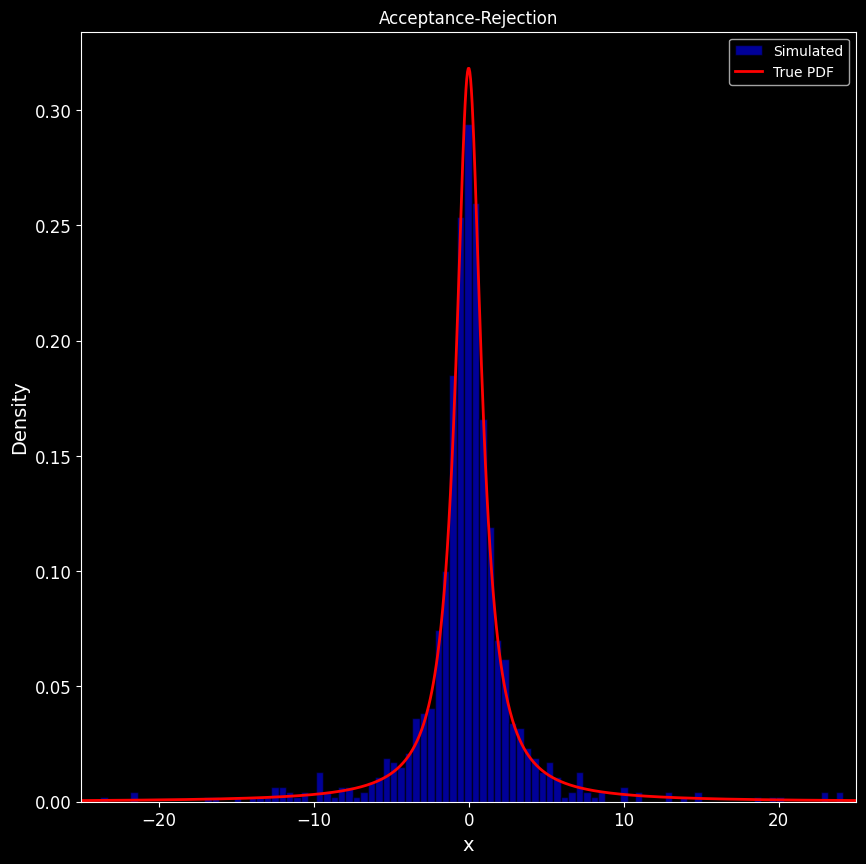

In [ ]:
#implementing the algorithm
def cauchy(n_samples):
  U=np.random.uniform(0,1,n_samples)
  X=np.tan(np.pi*(U-0.5))
  return X

n_samples = 1000
X_samples = cauchy(n_samples)
X_cauchy_plot = X_samples[np.abs(X_samples) < 25] #help from ChatGPT so that entire plot visible
x_plot = np.linspace(-25, 25, 1000)
plt.hist(X_cauchy_plot, bins=100, density=True, alpha=0.6, color='blue', edgecolor='black', label='Simulated')
plt.plot(x_plot, 1/(np.pi*(1 + x_plot**2)), 'r-', lw=2, label='True PDF')
plt.xlim(-25,25)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection')
plt.legend()
plt.show()

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

part b: Choose the smallest k $\geq f(x)/g(x)$ for all x. $k \geq (\frac{1}{\sqrt{2\pi}}e^{-x^2/2})/(\frac{1}{\pi(1+x^2)})=\frac{\pi}{\sqrt{2\pi}} (1+x^2) e^{-x^2/2}$. Looking at $(1+x^2) e^{-x^2/2}$, the derivative is $e^{-x^2/2}(x - x^3)$. The maximum occurs at -1, 1, and plugging this back into $(1+x^2) e^{-x^2/2}$, we get 1.213. Now, looking at the full equation, $k=\frac{\pi}{\sqrt{2\pi}} * 1.213 = 1.520$

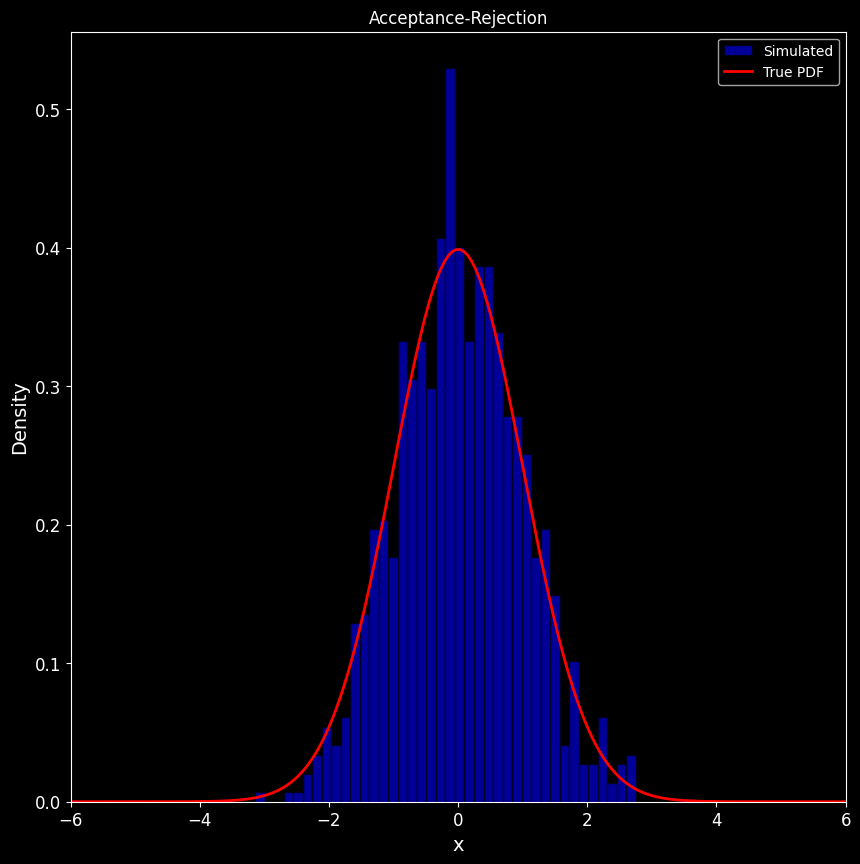

Average uniforms/sample: 3.022
95% CI: (2.916, 3.128)


In [ ]:
#part c
def f(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def g(x):
    return 1/(np.pi*(1+x**2))

def cauchy():
  U=np.random.uniform()
  return np.tan(np.pi*(U-0.5))

k = 1.520
def sample_X(n_samples):
    samples = []
    uniforms = []  # help from Claude for uniforms

    while len(samples) < n_samples:
        u_count = 0
        accepted = False
        while not accepted:
            Y = cauchy()
            u_count += 1  # help from Claude
            U = np.random.uniform()
            u_count += 1  # help from Claude

            if U < f(Y)/(k*g(Y)):
                samples.append(Y)
                uniforms.append(u_count)
                accepted = True

    return np.array(samples), np.array(uniforms)
n_samples = 1000
X_samples, uniforms = sample_X(n_samples)
x_plot = np.linspace(-6, 6, 200)
plt.hist(X_samples, bins=40, density=True, alpha=0.6, color='blue', edgecolor='black', label='Simulated')
plt.plot(x_plot, f(x_plot), 'r-', lw=2, label='True PDF')
plt.xlim(-6,6)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection')
plt.legend()
plt.show()

average = np.mean(uniforms)
std_uniforms = uniforms.std(ddof=1)
ci_low = average - 1.96 * std_uniforms / np.sqrt(n_samples)
ci_high = average + 1.96 * std_uniforms / np.sqrt(n_samples)

print(f"Average uniforms/sample: {average:.3f}")
print(f"95% CI: ({ci_low:.3f}, {ci_high:.3f})")